In [1]:
from OFDM import *
%matplotlib inline

In [2]:
# Create random bit stream, bits are length 10x OFDM symbol length - 0's

ofdm_symbol_size = 1024
cp_length = ofdm_symbol_size // 4
modulation = "QPSK"
pilots_per_block = 8
pilot_value = 1 + 1j

In [3]:
tx = transmitter(ofdm_symbol_size, cp_length, modulation, P=pilots_per_block, pilot_value=pilot_value)
no_bits = tx.bits_per_symbol * 50
bits = np.random.binomial(n=1, p=0.5, size=(no_bits, ))

signal = tx.transmit(bits, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK
Number of bits to transmit:         44600
Number of OFDM symbols to transmit: 50


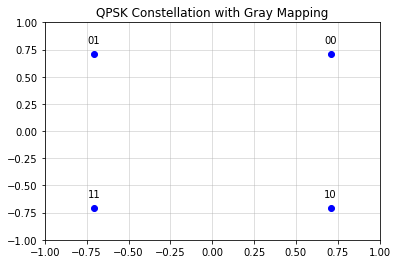

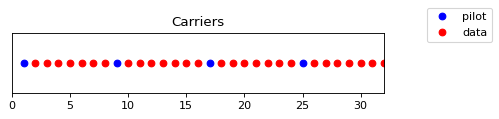

In [4]:
tx.graphs()

In [5]:
signal_rx = play_record(signal, tx.fs)
#scipy.io.wavfile.write(r"sound_files/signal.wav", tx.fs, signal)

Recording...
Finished recording


------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK
Number of received OFDM symbols:    50
Number of received bits:            44600


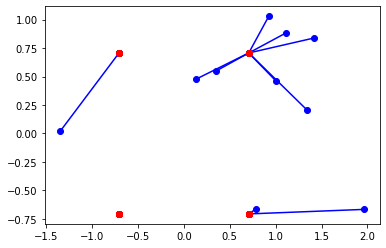

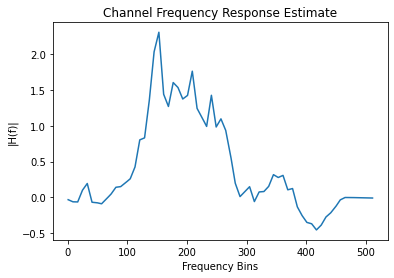

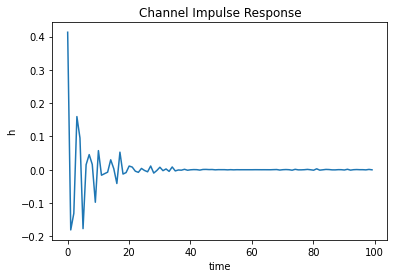

In [6]:
rx = receiver(ofdm_symbol_size, cp_length, modulation, P=pilots_per_block, pilot_value=pilot_value)

rx_bits = rx.receive(signal_rx)
rx.graphs()

In [7]:
errs = np.sum(abs(bits-rx_bits[:len(bits)]))
errs/len(bits)

0.10896860986547086

In [ ]:
ch = channel(ofdm_symbol_size, cp_length, modulation, P=pilots_per_block, pilot_value=pilot_value)
H, h = ch.measure_channel(bits)

------------------------------------------
Measure Channel
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK
Recording...
